<a href="https://colab.research.google.com/github/simaxxk/SistersLab_GraduationProject_IclalSeymaKoca/blob/main/SistersLab__GraduationProject_IclalSeymaKoca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this data set For the Olympic Games from 1896 to 2016, the name of the competitor,
#There is information such as gender, age, height, weight, the sport he competed in, and the medal he won.
#The data set given in this project was researched and analyzed.

**First of all, it should start with adding the imports to be used.**

In [5]:
import glob 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import  StandardScaler
import warnings

**Reading the data set and making the necessary adjustments.**

In [4]:
path ="/content/athlete_events.csv"
csv_files = glob.glob(path + "/*.csv")
df_list = (pd.read_csv(file) for file in csv_files)
athlete_events = pd.read_csv("athlete_events.csv")

**Analyzing the shape, type, head, tail and missing value (NA) information by parsing the data set.**

In [3]:
def check_df(dataframe, head=5):

    print("--Shape-- ")
    print(dataframe.shape)

    print("--Types-- ")
    print(dataframe.dtypes)


    print(" --Head--")
    print(dataframe.head(head))

    print("--Tail-- ")
    print(dataframe.tail(head))

    print("--NA-- ")
    print(dataframe.isnull().sum())

In [72]:
check_df(athlete_events)

--Shape-- 
(169756, 15)
--Types-- 
ID               int64
Name            object
Sex             object
Age            float64
Height         float64
Weight         float64
Team            object
NOC             object
Games           object
Year           float64
Season          object
City            object
Unnamed: 12    float64
Event           object
Medal           object
dtype: object
 --Head--
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games    Year  Season       City  Unnamed: 12  \
0  CHN  1992 Summer  1992.0  Summer  Barcelona          NaN   
1  CHN 

In [71]:
athlete_events.info

<bound method DataFrame.info of            ID                         Name  Sex   Age  Height  Weight  \
0           1                    A Dijiang    M  24.0   180.0    80.0   
1           2                     A Lamusi    M  23.0   170.0    60.0   
2           3          Gunnar Nielsen Aaby    M  24.0     NaN     NaN   
3           4         Edgar Lindenau Aabye    M  34.0     NaN     NaN   
4           5     Christine Jacoba Aaftink    F  21.0   185.0    82.0   
...       ...                          ...  ...   ...     ...     ...   
169751  85331              Nergin Tmennast    M  22.0     NaN     NaN   
169752  85332  Jos Socorro Neri Valenzuela    M  22.0   173.0    62.0   
169753  85333                   Maino Neri    M  24.0   170.0    76.0   
169754  85333                   Maino Neri    M  28.0   170.0    76.0   
169755     85                          NaN  NaN   NaN     NaN     NaN   

                  Team  NOC        Games    Year  Season         City  \
0                C

**Investigation of row and column wise.**

In [63]:
print(f'In athlatic events files  {athlete_events.shape[0]} rows and {athlete_events.shape[1]} columns are there.')

In athlatic events files  169756 rows and 15 columns are there.


**Searching for titles.**

In [64]:
list_athlatic_events = athlete_events.columns.tolist()
list_athlatic_events

['ID',
 'Name',
 'Sex',
 'Age',
 'Height',
 'Weight',
 'Team',
 'NOC',
 'Games',
 'Year',
 'Season',
 'City',
 'Unnamed: 12',
 'Event',
 'Medal']

**Tabulating and analyzing the content numerically.**

In [16]:
athlete_events

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Unnamed: 12,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992.0,Summer,Barcelona,NaN,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012.0,Summer,London,NaN,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920.0,Summer,Antwerpen,NaN,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900.0,Summer,Paris,NaN,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988.0,Winter,Calgary,NaN,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169751,85331,Nergin Tmennast,M,22.0,NaN,NaN,Mongolia,MGL,1992 Summer,1992.0,Summer,Barcelona,NaN,"Wrestling Men's Middleweight, Freestyle",NaN
169752,85332,Jos Socorro Neri Valenzuela,M,22.0,173.0,62.0,Mexico,MEX,1968 Summer,1968.0,Summer,Mexico City,NaN,"Athletics Men's 1,500 metres",NaN
169753,85333,Maino Neri,M,24.0,170.0,76.0,Italy,ITA,1948 Summer,1948.0,Summer,London,NaN,Football Men's Football,NaN
169754,85333,Maino Neri,M,28.0,170.0,76.0,Italy,ITA,1952 Summer,1952.0,Summer,Helsinki,NaN,Football Men's Football,NaN


In [68]:
print(athlete_events.isnull().sum().sort_values(ascending=False))

Unnamed: 12    169756
Medal          145135
Weight          39727
Height          37959
Age              5947
Name                1
Sex                 1
Team                1
NOC                 1
Games               1
Year                1
Season              1
City                1
Event               1
ID                  0
dtype: int64


**View and analyze data containing abbreviated forms of nation names.**

In [2]:
import glob 
import numpy as np 
import pandas as pd 
import os
path ="/content/noc_regions.csv"
csv_files = glob.glob(path + "/*.csv")
df_list = (pd.read_csv(file) for file in csv_files)
noc_regions = pd.read_csv("noc_regions.csv")

In [19]:
noc_regions

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


**Examining and visualizing the data that has no value in the data using the sns.set module.**

In [77]:
sns.set_theme()

In [78]:
sns.set(rc={"figure.dpi":100, "figure.figsize":(20,10)})

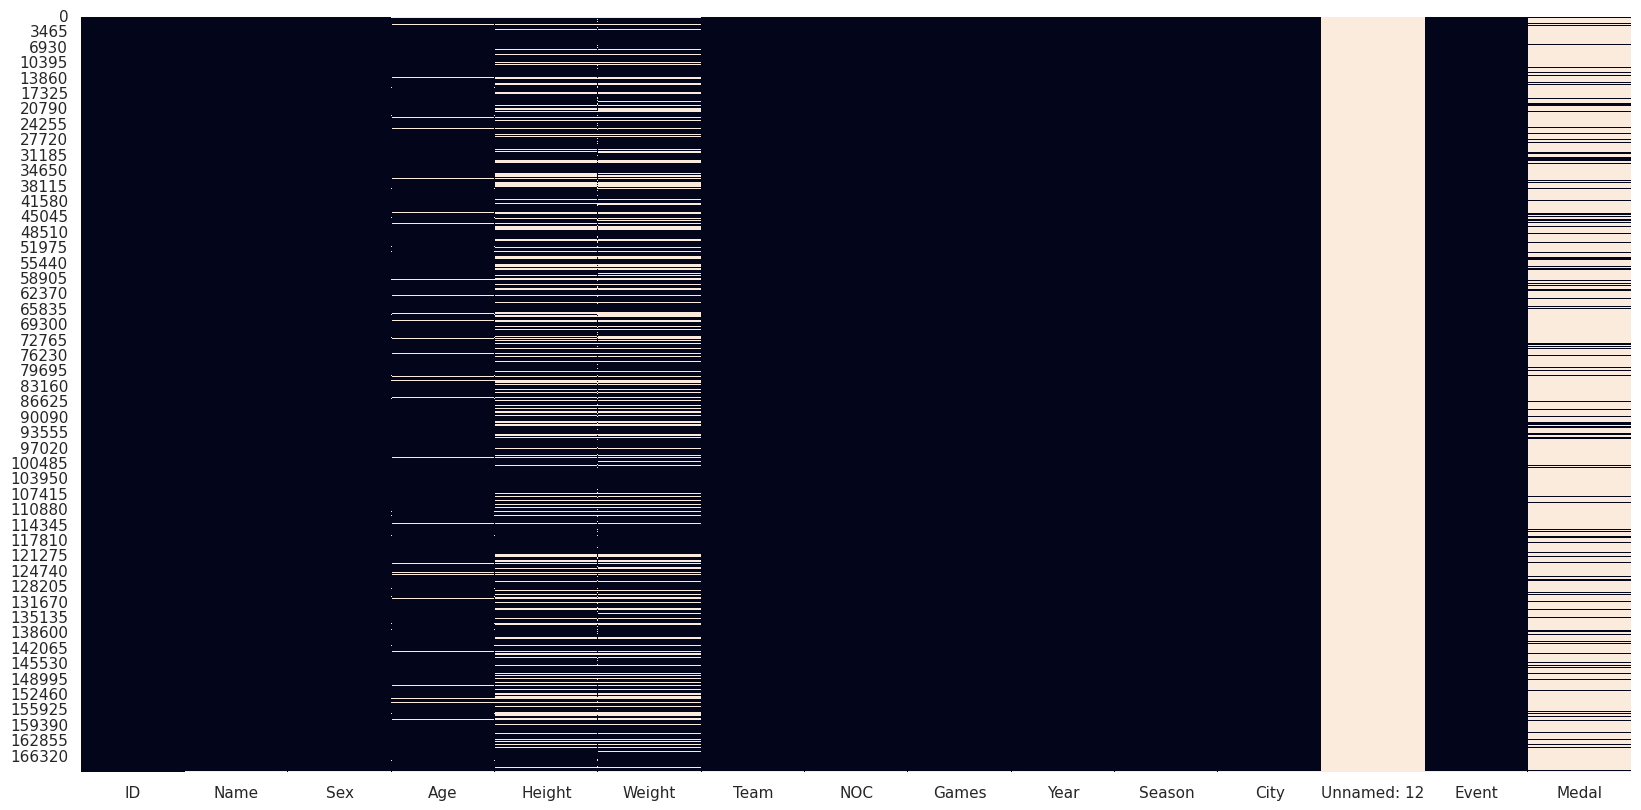

In [79]:
sns.heatmap(athlete_events.isnull(), cbar=False)

# ***Analyzes***

---



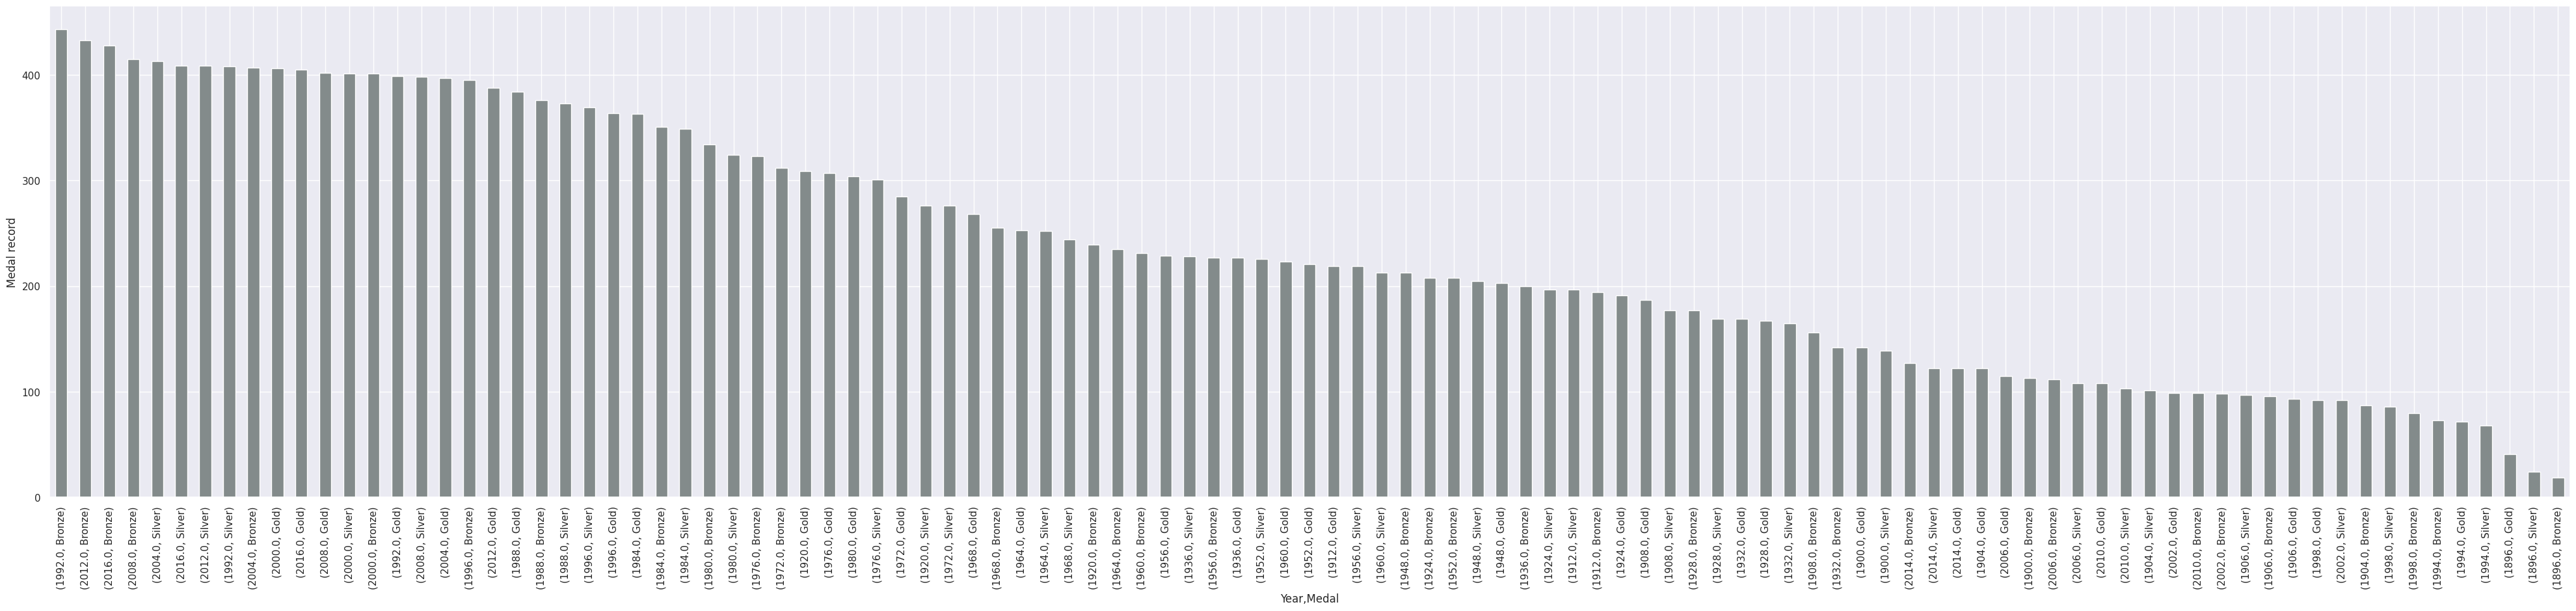

In [80]:
plt.figure(figsize=(50,10))
plt.ylabel('Medal record')
athlete_events.groupby("Year")["Medal"].value_counts().sort_values(ascending=False).plot.bar(width= 0.50, color="#838B8B")

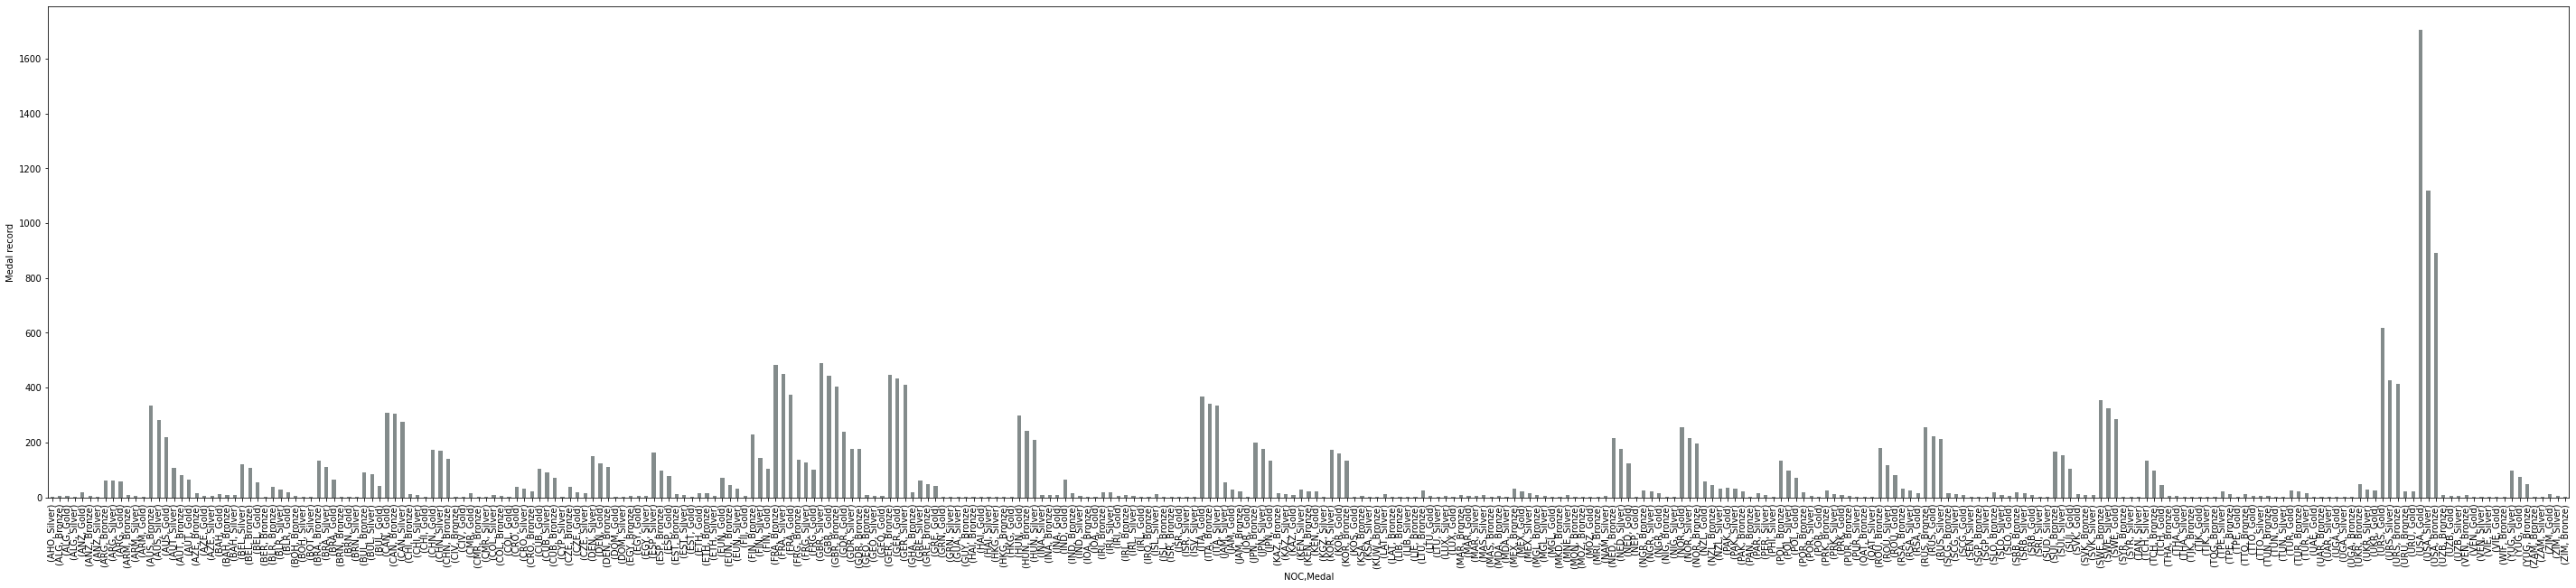

In [5]:
plt.figure(figsize=(50,10))
plt.ylabel('Medal record')
athlete_events.groupby("NOC")["Medal"].value_counts().plot.bar(width= 0.50, color="#838B8B")

In [ ]:
plt.figure(figsize=(50,10))
plt.ylabel('Nacionality')
athlete_events.groupby("NOC")["Name"].value_counts().plot.bar(width= 0.50, color="#838B8B")

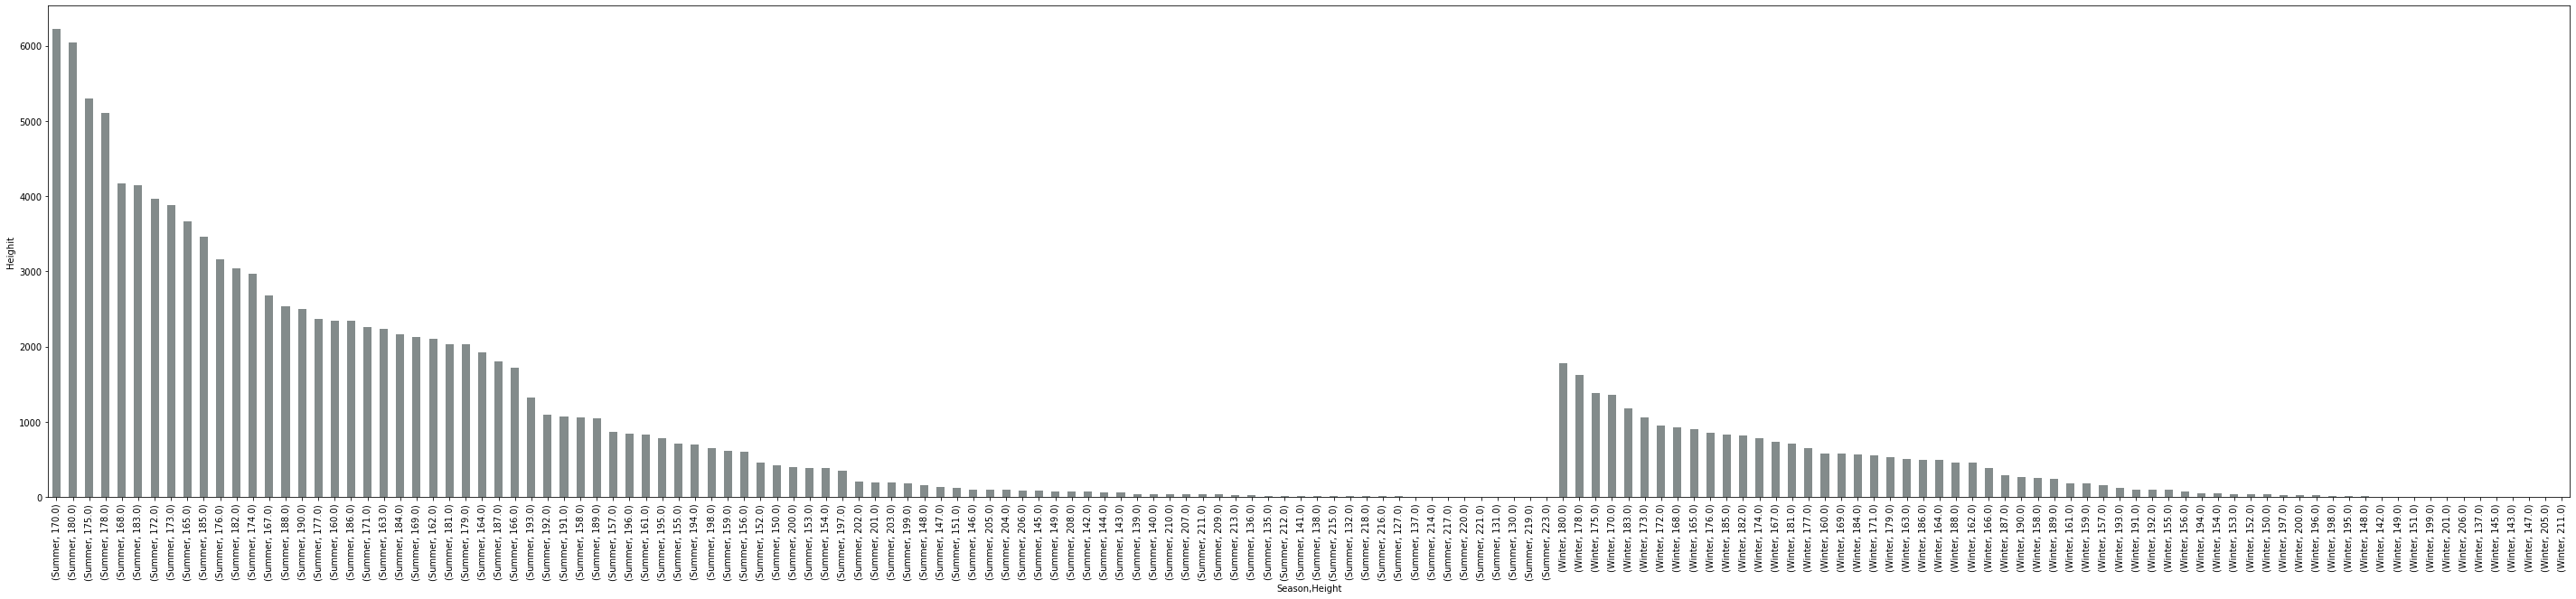

In [8]:
plt.figure(figsize=(50,10))
plt.ylabel('Heighit')
athlete_events.groupby("Season")["Height"].value_counts().plot.bar(width= 0.50, color="#838B8B")

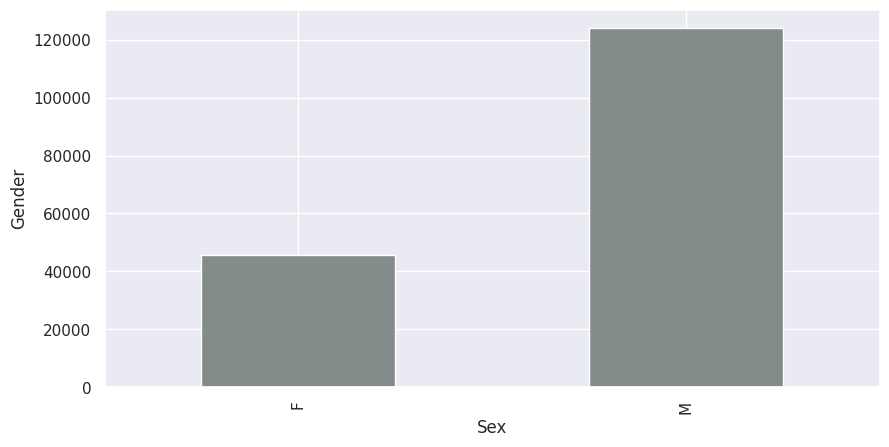

In [82]:
plt.figure(figsize=(10,5))
plt.ylabel('Gender')
athlete_events.groupby('Sex').size().plot.bar(width= 0.50, color="#838B8B")